### 1. Domain and Objectives
*The first step of the coursework is to identify and describe the domain-specific area.
This is an area of industry or science where a linear regression model will contribute.
It can be any field which can benefit from machine learning. Then state and justify
the objectives of the project. Discuss its impact and contribution to the domain-
specific area. State any contribution which the results may make to the challenge
addressed.*


**Domain** <br>
The resale industry revolves around buying products at low prices then repackaging and reselling these producs at market prices to generate a profit. This business strategy works as domain experts usually have a better idea of how things are priced thatn the general public. These experts can leverage their knowlege to find products that are undervalued. Resale exists in many industries, from selling bicycles on Facebook Marketplace to hunting down decrepid properties, refurbishing and flipping them. 
<br>

**Project Objectives and Justification** <br>
In this project I am going to create a machine learning regression model that can predict the price of laptops given a list of specs. The market price of a laptop might not be derived from the sum total value of its components. Instead, a laptop's price depends on a combination of different elements, such as build quality, brand, consumer demand as well as technical specifications. A machine learning model is likely able to find relationships between dependencies and generate an accurate prediction, given enough training examples.
<br>

**Impact and Contribution** <br>
If the model can provide accurate enough predictions, it can be used in combination with a webscraper to look at hundreds of laptops on the internet and flag ones that may be considered "undervalued". By automating this process, an individual might gain a competitive edge in the resale business as they will have the ability to screen far more products than competitors.

<br></br>
<br></br>
<br></br>
### 2. Dataset Description
*Provide a description of the dataset, its size, data types, the way the
data was acquired. State clearly the source of the dataset. Kaggle.com provides a
wide variety of datasets.*


This project will use the "Laptop Price" dataset available on Kaggle: 
[Laptop Price Dataset](https://www.kaggle.com/datasets/muhammetvarl/laptop-price/) <br>
This dataset contains 1320 laptop entries each with their specification listed. The source of the dataset does not specify how the data was aquired, it is likely that the data was scraped from e-commerce websites. Utilising this dataset, my hope is that there are sufficient entries to train an accurate regression model.

Each entry in the dataset has the following attributes (not necessarily in this order).
These attributes cover both physical and technical specifications and should have sufficient predictive power when used in combination.
|Attribute:|manufacturer|model|type name|screen size|screen resolution|CPU|GPU|RAM|storage|OS|weight|price|
|---|---|---|---|---|---|---|---|---|---|---|---|---|
|Datatype:|string|string|string|numeric|string|string|string|string|string|string|string|numeric|

<br>
The dataset is not in 1NF as many of the attributes are strings with inconsistent formating. For example:       "screen resolution" may appear in the form: *"Full HD 1920x1080"* or *"1920x1080"* or simply as *"Full HD"*. The "screen resolution" value will need to be extracted and encoded as a numerical value in the range (0-1). Similarly, the "storage" attribute is not an scalar value, so it will have to be split into two separate attributes: "ssd storage" and "hdd storage".

<br></br>
<br></br>
<br></br>
### 3. Data preparation (aquisition/cleaning/sanitisation/normalisation)
*Convert/store the dataset locally and preprocess the data. This is usually equivalent
to transforming a table from a database into First Normal Form (1NF). Describe the
preprocessing steps and why they were needed. Describe the file type/format, for
example CSV file. Process the dataset for missing data if needed. For this part use
Pandas DataFrame.*

The dataset is a csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Laptop_Prices.csv")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [2]:
# drop unnecessary columns
if ("laptop_ID" in df): df.drop(columns=["laptop_ID"], inplace=True)
if ("TypeName" in df): df.drop(columns=["TypeName"], inplace=True)

To transform the weight column into a usable format, I need to extract the numeric part of the weight attibutes

In [3]:
def Extract_Weight(x):
    return float(x[:-2])
    
if ("Weight" in df):
    # create column weight
    df["Weight (kg)"] = [""] * len(df["Company"])
    # adapted from https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
    df["Weight (kg)"] = df["Weight"].apply(lambda x: Extract_Weight(x))
    df.drop(columns=["Weight"], inplace=True)

I need to ensure that the operating system names are consistent

In [4]:
def Extract_OS(x):
    os = x
    if x == "Mac Os X":
        os = "MacOS"
    if x == "macOS":
        os = "MacOS"
    if x == "Windows 10 S":
        os = "Windows 10"
    return os
    
if ("OpSys" in df):
    # create column OS
    df["OS"] = df["OpSys"].apply(lambda x: Extract_OS(x))
    df.drop(columns=["OpSys"], inplace=True)

The screen resolution values are not in a usable format, to fix it I will split the values into two columns "Resolution Width" and "Resolution Height"

In [5]:
def Extract_Res_Width(x):
    words = x.split(" ")
    res = words[-1]
    resParts = res.split("x")
    return int(resParts[0])

def Extract_Res_Height(x):
    words = x.split(" ")
    res = words[-1]
    resParts = res.split("x")
    return int(resParts[-1])

if ("ScreenResolution" in df):
    # create two new columns "resolution width" & "resolution height"
    df["Resolution Width"] = df["ScreenResolution"].apply(lambda x: Extract_Res_Width(x))
    df["Resolution Height"] = df["ScreenResolution"].apply(lambda x: Extract_Res_Height(x))
    df.drop(columns=["ScreenResolution"], inplace=True)


I will turn the RAM attributes into a usable format by extracing the numeric part

In [6]:
def Extract_RAM(x):
    return x[:-2]

if ("Ram" in df): 
    # create column RAM
    df["RAM (GB)"] = df["Ram"].apply(lambda x: Extract_RAM(x))
    df.drop(columns=["Ram"], inplace=True)

The "memory" specs are incorrectly named as such and there are 4 different types of storage:
1. HDD Storage
2. SDD Storage
3. Flash Storage
4. hybrid Storage
   
I will combine Flash and SSD storage and add 3 new dataframe columns.The columns specify a storage quanitity in GBs. To extract the values, I search for the words "HDD" "SSD" "Flash" and "Hybrid" and parse the humeric values into the three columns. 

In [7]:
def Extract_HDD(x):
    words = x.split(" ")
    total = 0
    i = 0
    for i in range(len(words)):
        if words[i] == "HDD":
            sWord = words[i-1]
            if sWord[-2:] == "GB":
                total += float(sWord[0:-2])
            else:
                total += float(sWord[0:-2]) * 1000
    return int(total)

def Extract_SSD(x):
    words = x.split(" ")
    total = 0
    i = 0
    for i in range(len(words)):
        if words[i] == "SSD" or words[i] == "Flash":
            sWord = words[i-1]
            if sWord[-2:] == "GB":
                total += float(sWord[0:-2])
            else:
                total += float(sWord[0:-2]) * 1000
    return int(total)

def Extract_Hybrid(x):
    words = x.split(" ")
    total = 0
    i = 0
    for i in range(len(words)):
        if words[i] == "Hybrid":
            sWord = words[i-1]
            if sWord[-2:] == "GB":
                total += float(sWord[0:-2])
            else:
                total += float(sWord[0:-2]) * 1000
    return int(total)

if ("Memory" in df): 
    # create three new columns "SSD storage", "HDD storage" and "Hybrid storage"
    df["HDD Storage (GB)"] = df["Memory"].apply(lambda x: Extract_HDD(x))
    df["SSD Storage (GB)"] = df["Memory"].apply(lambda x: Extract_SSD(x))
    df["Hybrid Storage (GB)"] = df["Memory"].apply(lambda x: Extract_Hybrid(x))
    df.drop(columns=["Memory"], inplace=True)

There is a lot of useful information in the "Cpu" column. This compound information is concatenated into a string and so violates 1NF. I will parse this data into three columns:
1. CPU Manufacturer
2. CPU Name
3. CPU Clockspeed

The CPU Manufacturer is a useful piece of information that I will use to compare CPU models later, therefore; it is a good idea to include this as a dedicated column. In the "Extract_CPU_Name" function, I am specifically combining all i7s i5s and i3s together as there are loads of different Intel CPUs which could make plotting difficult. Consumers typically care more about which class an Intel CPU belongs to than the specific model. 
CPU clockspeed is a useful number that gives an indication of the CPU's processing power (in light of the CPU name). The prediction model should find this information useful as more powerful processors demand a higher price.

In [8]:
def Extract_CPU_Manufacturer(x):
    manufacturers = ["Intel", "AMD", "Samsung", "ARM"]
    for m in manufacturers:
        if m in x:
            return m

def Extract_CPU_Name(x):
    words = x.split(" ")
    middleWords = words[1:-1]
    name = None
    if "i3" in middleWords:
        name = "i3"
    elif "i5" in middleWords:
        name = "i5"
    elif "i7" in middleWords:
        name = "i7"
    else:
        name = " ".join(middleWords)
    return name

def Extract_CPU_Clockspeed(x):
    words = x.split(" ")
    return words[-1][0:-3]
    
if ("Cpu" in df): 
    # create three new columns "CPU" "CPU manufacturer" & "CPU clockspeed"
    df["CPU Manufacturer"] = df["Cpu"].apply(lambda x: Extract_CPU_Manufacturer(x))
    df["CPU"] = df["Cpu"].apply(lambda x: Extract_CPU_Name(x))
    df["CPU Clockspeed (GHz)"] = df["Cpu"].apply(lambda x: Extract_CPU_Clockspeed(x))
    df.drop(columns=["Cpu"], inplace=True)

There is a little less information about GPU models so I am splitting the original "Gpu" column into two columns:
1. GPU Manufacturer
2. GPU

In [9]:
def Extract_GPU_Manufacturer(x):
    manufacturers = ["Nvidia", "Intel", "AMD", "Samsung", "ARM"]
    for m in manufacturers:
        if m in x:
            return m
        
def Extract_GPU_Name(x):
    words = x.split(" ")
    return " ".join(words[1:])
    
if ("Gpu" in df): 
    # create two new columns "GPU" & "GPU manufacturer" 
    df["GPU Manufacturer"] = df["Gpu"].apply(lambda x: Extract_GPU_Manufacturer(x))
    df["GPU"] = df["Gpu"].apply(lambda x: Extract_GPU_Name(x))
    df.drop(columns=["Gpu"], inplace=True)

Finally, I am renaming the "Price_euros" column and appending it to the end so that everything is in a logical order.

In [10]:
if ("Price_euros" in df):
    df["Price (EUR)"] = df["Price_euros"]
    df.drop(columns=["Price_euros"], inplace=True)

df.head(5)

,Company,Product,Inches,Weight (kg),OS,Resolution Width,Resolution Height,RAM (GB),HDD Storage (GB),SSD Storage (GB),Hybrid Storage (GB),CPU Manufacturer,CPU,CPU Clockspeed (GHz),GPU Manufacturer,GPU,Price (EUR)
0,Apple,MacBook Pro,13.3,1.37,MacOS,2560,1600,8,0,128,0,Intel,i5,2.3,Intel,Iris Plus Graphics 640,1339.69
1,Apple,Macbook Air,13.3,1.34,MacOS,1440,900,8,0,128,0,Intel,i5,1.8,Intel,HD Graphics 6000,898.94
2,HP,250 G6,15.6,1.86,No OS,1920,1080,8,0,256,0,Intel,i5,2.5,Intel,HD Graphics 620,575.00
3,Apple,MacBook Pro,15.4,1.83,MacOS,2880,1800,16,0,512,0,Intel,i7,2.7,AMD,Radeon Pro 455,2537.45
4,Apple,MacBook Pro,13.3,1.37,MacOS,2560,1600,8,0,256,0,Intel,i5,3.1,Intel,Iris Plus Graphics 650,1803.60


### 4. Statistical analysis
Identify key series of the dataset and provide statistical summary of the data,
including:
- Measures of central tendency
- Measures of spread
- Type of distribution
This can be done by using libraries such as NumPy, pandas and SciPy. Most likely
the dataset will consist of multiple series.

In [11]:
df.describe()

,Inches,Weight (kg),Resolution Width,Resolution Height,HDD Storage (GB),SSD Storage (GB),Hybrid Storage (GB),Price (EUR)
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,1894.784344,1070.830391,413.783576,188.288565,8.831926,1123.686992
std,1.426304,0.665475,494.641028,284.519410,515.818779,184.926513,92.567185,699.009043
min,10.100000,0.690000,1366.000000,768.000000,0.000000,0.000000,0.000000,174.000000
25%,14.000000,1.500000,1600.000000,900.000000,0.000000,0.000000,0.000000,599.000000
50%,15.600000,2.040000,1920.000000,1080.000000,0.000000,256.000000,0.000000,977.000000
75%,15.600000,2.300000,1920.000000,1080.000000,1000.000000,256.000000,0.000000,1487.880000
max,18.400000,4.700000,3840.000000,2160.000000,2000.000000,1024.000000,1000.000000,6099.000000


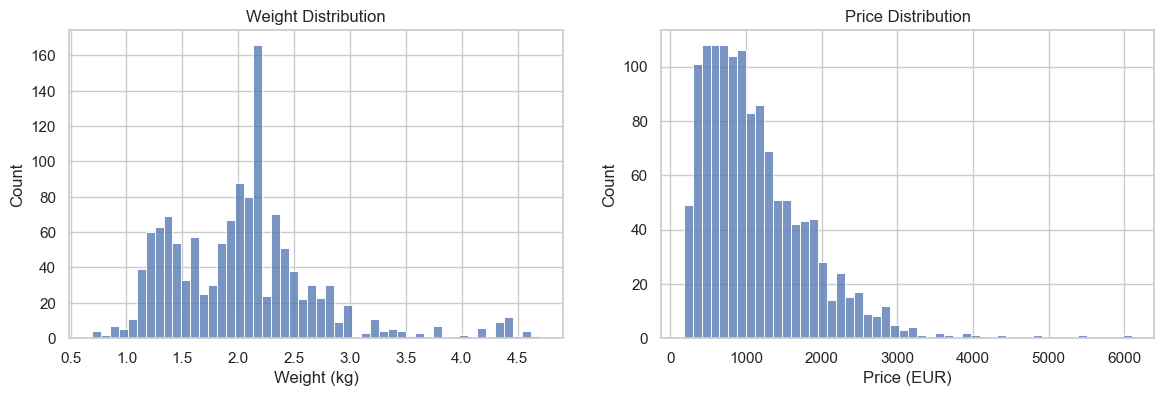

In [19]:
import matplotlib

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(data=df["Weight (kg)"], ax=ax[0], bins=50).set(title="Weight Distribution") 
sns.histplot(data=df["Price (EUR)"], ax=ax[1], bins=50).set(title="Price Distribution") 
plt.show()

### 5. Visualisation
Visualise key data series within the dataset by using the appropriate graphs. This
can be done by using Python libraries, such as Matplotlib. Accompany any diagram
with explanations - we will not award any points if you do not. Draw conclusions
based on the diagrams, which otherwise, without visualisation would be difficult or
impossible. Which visualisation (of the ones you prepared) is most important and
why?
6. Build your ML (Machine Learning) model
- Identify the features and the labels which will be used in the data regression
model and justify why they were selected
- Explain their (i.e. features) importance for the process of building the ML
model
- Build the model by using an appropriate Python library, such as Weka or
Scikit-learn
- Run and evaluate your model: does your model fit the data or further pre-processing is required?

### 7. Validation
Consider how the model’s results could be validated using either cross validation or
other models/ensembles.

### 8. Feature engineering
Your model would benefit from using feature engineering techniques or polynomial
features as described in Topic 5.4. Implement these techniques and re-evaluate your
model.

Aditional features can be generated from the CPU and GPU attributes of the dataset. For the CPU attribute, aditional features include: core count, thread count, base frequency and  turbo requency. For the GPU attribute, additional features include: core count, VRAM.

### 9. Programming style
The Python code is expected to meet certain standards as described by most coding
conventions. This includes code indentation, not using unnamed numerical
constants, assigning meaningful names to variables and subroutines. Additionally,
the code is expected to be commented, including all variables, sub-routines and calls
to library methods.

### 10. Evaluation of your model (200 to 400 words)
Evaluate the results of the machine learning model:
- Numerically evaluate the performance of the model
- Justify the use of an appropriate measure such as RMSE
- Provide a reflective evaluation of the developed project considering the
obtained results
- Describe its contributions to the selected domain-specific area
- Discuss whether the solution is transferable to other domain-specific areas